# **Machine Learning Programming**

# Week08_KNN & NB

### - **Submit either Assignment 1 or Assignment 2**


### - **Please note that the code must be submitted in a state where it runs correctly when executed by the TA.**

---

## **Assignment 1. KNN** (10 points)
Download and load the **Wine** dataset.
Then, build and train a KNN model.
- When training, you may selectively use a few variables if you wish.
- Determine the optimal k value based on accuracy or a decision boundary plot, and explain the reasoning behind your choice.



### 1 Data Load and Preprocessing (2 points)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
wine = pd.read_csv('/content/wine.csv')
wine

,Wine,Alcohol,Flavanoids,Color.int,Proline
0,1,14.23,3.06,5.64,1065
1,1,13.20,2.76,4.38,1050
2,1,13.16,3.24,5.68,1185
3,1,14.37,3.49,7.80,1480
4,1,13.24,2.69,4.32,735
...,...,...,...,...,...
173,3,13.71,0.61,7.70,740
174,3,13.40,0.75,7.30,750
175,3,13.27,0.69,10.20,835
176,3,13.17,0.68,9.30,840


In [ ]:
print(wine.head())
print(wine.columns)

   Wine  Alcohol  Flavanoids  Color.int  Proline
0     1    14.23        3.06       5.64     1065
1     1    13.20        2.76       4.38     1050
2     1    13.16        3.24       5.68     1185
3     1    14.37        3.49       7.80     1480
4     1    13.24        2.69       4.32      735
Index(['Wine', 'Alcohol', 'Flavanoids', 'Color.int', 'Proline'], dtype='object')


### 2 Train/Test Split
- Split the datasets into train and test sets.

In [ ]:
# Split the dataset
X = wine.drop('Wine',axis = 1 )
y = wine['Wine']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [ ]:
print(f"\n\n Total Data: {len(wine)}")
print(f"Train set: {len(X_train)} ( {len(X_train)/len(wine):.1%})")
print(f"Test set: {len(X_test)} ( {len(X_test)/len(wine):.1%})")



 Total Data: 178
Train set: 142 ( 79.8%)
Test set: 36 ( 20.2%)


### 3 Model Training (3 points)
- Train KNN classifier with the preprocessed data.

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n--- Data Scaling Complete ---")
print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)


--- Data Scaling Complete ---
X_train_scaled shape: (142, 4)
X_test_scaled shape: (36, 4)


In [ ]:
from sklearn.model_selection import GridSearchCV

print("\n--- Starting Hyperparameter Tuning ---")

knn = KNeighborsClassifier()
param_grid = {'n_neighbors':range(1,21,2)}
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1,return_train_score=True)
grid_search.fit(X_train_scaled,y_train)

print("--- Hyperparameter Tuning Complete ---")
print("\nBest parameters found:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)



--- Starting Hyperparameter Tuning ---
--- Hyperparameter Tuning Complete ---

Best parameters found: {'n_neighbors': 13}
Best cross-validation score: 0.9788177339901478



Best tuned KNN model ready.


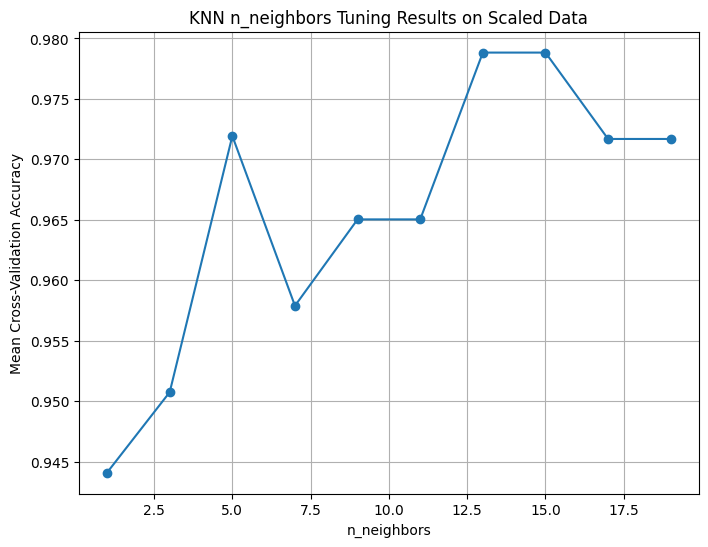

In [ ]:
best_knn_model = grid_search.best_estimator_
print("\nBest tuned KNN model ready.")

results = pd.DataFrame(grid_search.cv_results_)
plt.figure(figsize=(8, 6))
plt.plot(results['param_n_neighbors'], results['mean_test_score'], marker='o')
plt.xlabel('n_neighbors')
plt.ylabel('Mean Cross-Validation Accuracy')
plt.title('KNN n_neighbors Tuning Results on Scaled Data')
plt.grid(True)
plt.show()

### 4 Evaluation (5 points)
- Calculate training/test accuracy or make a decision boundary plot based on various k values. (2 points)

- Write a simple interpretation of which k value gives the best performance. (3 points)

In [ ]:
results = pd.DataFrame(grid_search.cv_results_)
tuning_accuracy_results = results[['param_n_neighbors', 'mean_train_score', 'mean_test_score', 'std_test_score']]
tuning_accuracy_results.columns = ['n_neighbors', 'Mean Train Accuracy (CV)', 'Mean Validation Accuracy (CV)', 'Std Validation Accuracy (CV)']
tuning_accuracy_results = tuning_accuracy_results.sort_values(by='n_neighbors')
print("--- training/test accuracy or make a decision boundary plot based on various k values ---")
print(tuning_accuracy_results)

--- training/test accuracy or make a decision boundary plot based on various k values ---
   n_neighbors  ...  Std Validation Accuracy (CV)
0            1  ...                      0.035228
1            3  ...                      0.017118
2            5  ...                      0.014050
3            7  ...                      0.013432
4            9  ...                      0.021817
5           11  ...                      0.021817
6           13  ...                      0.017301
7           15  ...                      0.017301
8           17  ...                      0.014171
9           19  ...                      0.014171

[10 rows x 4 columns]


Your interpretation of the optimal k value (3 points):

Based on the cross-validation results, the n_neighbors values that achieved the highest mean validation accuracy (Mean Validation Accuracy) are 13 and 15, both reaching approximately 0.980 on the graph.

These values (13 and 15) exhibit high mean accuracy while maintaining a relatively low standard deviation of validation accuracy (Std Validation Accuracy) at 0.017301, compared to 0.035228 for n_neighbors = 1, indicating stable model performance.

Considering both high average performance and stability, 13 and 15 are the optimal n_neighbors candidates. Grid Search selected 13 as the final optimal value, likely because a smaller k value reduces model complexity and the risk of overfitting.



---



## **Assignment 2. Naive Bayes** (10 points)

Scikit-learn offers a dataset called Twenty Newsgroups, which contains 18,846 newsgroup posts on 20 different topics. Solve this task using the Naive Bayes model.

Code for preparing the 20newsgroup data will be provided.

### 1 Data Load and Preprocessing (2 points)

In [1]:
from sklearn.datasets import fetch_20newsgroups
newsdata = fetch_20newsgroups(subset='train')
newsdata_test = fetch_20newsgroups(subset='test', shuffle=True)

In [4]:
# Define a regular expression and cleanse the train and test text so that only letters remain.
import re

train_text = []
for text in newsdata.data:
    cleaned_text = re.sub(r'[^a-zA-Z ]', '', text)
    train_text.append(cleaned_text)

test_text = []
for text in newsdata_test.data:
    cleaned_text = re.sub(r'[^a-zA-Z ]', '', text)
    test_text.append(cleaned_text)

In [5]:
# Convert uppercase letters to lowercase.
train_text = [text.lower() for text in train_text]
test_text = [text.lower() for text in test_text]

In [7]:
# Check the data.

print(f"--- 1 Data Load and Preprocessing: Data Validation Checks ---")

print(f"\nChecking Data Types:")
print(f"Type of newsdata object: {type(newsdata)}")
print(f"Type of newsdata.data: {type(newsdata.data)}")
print(f"Type of newsdata.target: {type(newsdata.target)}")
print(f"Type of train_text list: {type(train_text)}")
print(f"Type of elements in train_text (first 5): {[type(t) for t in train_text[:5]]}")

print(f"Type of newsdata_test object: {type(newsdata_test)}")
print(f"Type of newsdata_test.data: {type(newsdata_test.data)}")
print(f"Type of newsdata_test.target: {type(newsdata_test.target)}")
print(f"Type of test_text list: {type(test_text)}")
print(f"Type of elements in test_text (first 5): {[type(t) for t in test_text[:5]]}")

print(f"\nChecking Data Count Consistency:")
train_data_count = len(newsdata.data)
train_text_count = len(train_text)
train_target_count = len(newsdata.target)

test_data_count = len(newsdata_test.data)
test_text_count = len(test_text)
test_target_count = len(newsdata_test.target)

print(f"Train Counts: newsdata.data={train_data_count}, train_text={train_text_count}, newsdata.target={train_target_count}")
print(f"Test Counts: newsdata_test.data={test_data_count}, test_text={test_text_count}, newsdata_test.target={test_target_count}")

if train_data_count == train_text_count == train_target_count:
    print("Train data counts are consistent.")
else:
    print("Warning: Train data counts are inconsistent!")

if test_data_count == test_text_count == test_target_count:
    print("Test data counts are consistent.")
else:
     print("Warning: Test data counts are inconsistent!")

print(f"\nChecking Target Value Range:")
print(f"Train Target Min/Max: {newsdata.target.min()} / {newsdata.target.max()}")
print(f"Test Target Min/Max: {newsdata_test.target.min()} / {newsdata_test.target.max()}")
print(f"Total number of target classes: {len(newsdata.target_names)}")

print(f"\nChecking Sample Text Validity:")
sample_indices_train = [0, min(5, len(train_text)-1)]
sample_indices_test = [0, min(5, len(test_text)-1)]

for idx in sample_indices_train:
    if len(train_text[idx].strip()) == 0:
        print(f"Warning: Train sample #{idx} is empty after preprocessing!")
    else:
        print(f"Train sample #{idx} text length: {len(train_text[idx].strip())} (first 50 chars: {train_text[idx][:50]})")

for idx in sample_indices_test:
     if len(test_text[idx].strip()) == 0:
         print(f"Warning: Test sample #{idx} is empty after preprocessing!")
     else:
         print(f"Test sample #{idx} text length: {len(test_text[idx].strip())} (first 50 chars: {test_text[idx][:50]})")

print(f"\n--- Data Validation Checks Complete ---")

--- 1 Data Load and Preprocessing: Data Validation Checks ---

Checking Data Types:
Type of newsdata object: <class 'sklearn.utils._bunch.Bunch'>
Type of newsdata.data: <class 'list'>
Type of newsdata.target: <class 'numpy.ndarray'>
Type of train_text list: <class 'list'>
Type of elements in train_text (first 5): [<class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>]
Type of newsdata_test object: <class 'sklearn.utils._bunch.Bunch'>
Type of newsdata_test.data: <class 'list'>
Type of newsdata_test.target: <class 'numpy.ndarray'>
Type of test_text list: <class 'list'>
Type of elements in test_text (first 5): [<class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>]

Checking Data Count Consistency:
Train Counts: newsdata.data=11314, train_text=11314, newsdata.target=11314
Test Counts: newsdata_test.data=7532, test_text=7532, newsdata_test.target=7532
Train data counts are consistent.
Test data counts are consistent.

Checking Target Value Range:
Tra

### 2 Train/Test Split
- Split the dataset into train and test sets.

In [8]:
# Split the dataset
print(f"\n--- 2 Train/Test Split ---")
print(f"Data has already been split into training and test sets during loading.")

print(f"\nTraining Set Size: {len(newsdata.data)} news articles")
print(f"Test Set Size: {len(newsdata_test.data)} news articles")

print(f"\nTraining Data Variable: 'newsdata' (contains .data and .target)")
print(f"Test Data Variable: 'newsdata_test' (contains .data and .target)")
print(f"Preprocessed Training Text: 'train_text' (list)")
print(f"Preprocessed Test Text: 'test_text' (list)")
print(f"Training Targets: 'newsdata.target'")
print(f"Test Targets: 'newsdata_test.target'")


--- 2 Train/Test Split ---
Data has already been split into training and test sets during loading.

Training Set Size: 11314 news articles
Test Set Size: 7532 news articles

Training Data Variable: 'newsdata' (contains .data and .target)
Test Data Variable: 'newsdata_test' (contains .data and .target)
Preprocessed Training Text: 'train_text' (list)
Preprocessed Test Text: 'test_text' (list)
Training Targets: 'newsdata.target'
Test Targets: 'newsdata_test.target'


### 3 Count Vectorize (3 points)


#### 3.1 word tokenize

In [10]:
# Import the necessary package for word tokenization.
import nltk

try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


#### 3.2 count vectorize

In [11]:
# Import Count Vectorizer from scikit-learn.
from sklearn.feature_extraction.text import CountVectorizer

In [13]:
def simple_word_tokenizer(text):
    return text.split()

In [14]:
# Declare a count vectorizer that uses word_tokenize.
vectorizer = CountVectorizer(tokenizer=simple_word_tokenizer, max_features=20000)
print(f"  - tokenizer: simple_word_tokenizer")
print(f"  - (max_features): {vectorizer.max_features}")

  - tokenizer: simple_word_tokenizer
  - (max_features): 20000


In [15]:
# Train the count vectorizer.
vectorizer.fit(train_text)
print("CountVectorizer 🚈 Comeplete.")

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


CountVectorizer 🚈 Comeplete.


In [17]:
# Check the total number of words.

learned_words = vectorizer.get_feature_names_out()

total_words = len(learned_words)

print(f"Total_words: {total_words}")

print(f"CountVectorizer  max_features: {vectorizer.max_features}")
if total_words <= vectorizer.max_features:
     print("Good.")
else:
     print("No Good")

print("\n learend_wrods Example :")
print(learned_words[:20])

Total_words: 20000
CountVectorizer  max_features: 20000
Good.

 learend_wrods Example :
['a' 'aa' 'aaa' 'aafreenetcarletonca' 'aainetgwpadeccom' 'aamir' 'aario'
 'aaron' 'aaspocwruedu' 'ab' 'abad' 'abandon' 'abandoned' 'abate'
 'abbreviation' 'abc' 'abclevelandfreenetedu' 'abdul' 'aberystwythlines'
 'abetter']


In [18]:
# Transform the train text and test text.
X_train_counts = vectorizer.transform(train_text)
X_test_counts = vectorizer.transform(test_text)

print(f"\n Train Counts: {X_train_counts.shape}")
print(f"Test Counts: {X_test_counts.shape}")


 Train Counts: (11314, 20000)
Test Counts: (7532, 20000)


### 4 Naive Bayes (5 points)

In [19]:
# Import the appropriate naive bayes model and define the model.
from sklearn.naive_bayes import MultinomialNB
naive_bayes_model = MultinomialNB(alpha=1.0)

In [20]:
# Train the model.
naive_bayes_model.fit(X_train_counts, newsdata.target)

MultinomialNB()

In [21]:
# Predict with train and test data.
y_pred_train = naive_bayes_model.predict(X_train_counts)

y_pred_test = naive_bayes_model.predict(X_test_counts)

print("\n Train Example:", y_pred_train[:10])
print("Test Example:", y_pred_test[:10])


 Train Example: [ 7  4  4  1 14 16 13  3  2  4]
Test Example: [ 7  1  0 17  0 13 15  2  5  1]


In [23]:
from sklearn.metrics import accuracy_score
train_acc = accuracy_score(newsdata.target, y_pred_train)
test_acc = accuracy_score(newsdata_test.target, y_pred_test)

print(f"Train Accuracy is {train_acc:.4f}")
print(f"Test Accuracy is {test_acc:.4f}")


Train Accuracy is 0.9517
Test Accuracy is 0.8042


In [26]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
import numpy as np

print("--- Starting Naive Bayes Hyperparameter Tuning (using Pipeline) ---")

# 1. Define Pipeline
# Step names can be chosen freely, but are used later in parameter grid definition.
pipeline = Pipeline([
    ('countvectorizer', CountVectorizer(tokenizer=simple_word_tokenizer)), # Specify tokenizer
    ('multinomialnb', MultinomialNB()) # Naive Bayes Model
])

# 2. Define Parameter Grid
# Format: 'stepname__parametername'
param_grid = {
    'countvectorizer__max_features': [10000, 20000, 30000], # max_features candidate range
    'multinomialnb__alpha': [0.1, 0.5, 1.0, 5.0, 10.0]      # alpha candidate range
}

print(f"Parameter Grid defined: {param_grid}")

# 3. Apply GridSearchCV
# estimator: The pipeline to tune
# param_grid: The hyperparameter grid to search
# cv: Number of cross-validation folds (e.g., 5-Fold)
# scoring: Evaluation metric (e.g., 'accuracy', 'f1_weighted' are common for text classification)
# n_jobs: Number of CPU cores to use (-1 uses all available cores)
# return_train_score=True: Record score on training folds as well (useful for analysis)
grid_search_nb = GridSearchCV(estimator=pipeline,
                              param_grid=param_grid,
                              cv=5, # 5-Fold Cross-Validation
                              scoring='accuracy',
                              n_jobs=-1, # Use all CPU cores
                              return_train_score=True)

print("GridSearchCV object created. Starting tuning execution...")

# 4. Execute Tuning (using preprocessed training text and original targets)
# The Pipeline's fit method internally handles:
# train_text -> CountVectorizer (fit_transform) -> MultinomialNB (fit) process
# GridSearchCV repeats this for each param_grid combination, cv times.
grid_search_nb.fit(train_text, newsdata.target) # <-- Note: Use preprocessed text (train_text) and original targets!

print("\n--- Naive Bayes Hyperparameter Tuning Complete ---")

# Check best results
print("\nBest parameters found:", grid_search_nb.best_params_)
print("Best cross-validation accuracy:", grid_search_nb.best_score_)

# Final pipeline model trained with the best hyperparameters
best_nb_pipeline = grid_search_nb.best_estimator_
print("\nBest tuned pipeline ready.")

# Now, you can use best_nb_pipeline to perform final evaluation on the test data (test_text, newsdata_test.target).
final_test_accuracy = best_nb_pipeline.score(test_text, newsdata_test.target)
print(f"Best pipeline final test accuracy: {final_test_accuracy:.4f}")

--- Starting Naive Bayes Hyperparameter Tuning (using Pipeline) ---
Parameter Grid defined: {'countvectorizer__max_features': [10000, 20000, 30000], 'multinomialnb__alpha': [0.1, 0.5, 1.0, 5.0, 10.0]}
GridSearchCV object created. Starting tuning execution...


/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(



--- Naive Bayes Hyperparameter Tuning Complete ---

Best parameters found: {'countvectorizer__max_features': 30000, 'multinomialnb__alpha': 0.1}
Best cross-validation accuracy: 0.8919924687032736

Best tuned pipeline ready.
Best pipeline final test accuracy: 0.8204


Your own analysis of the results (3 points) :<br>
After converting the Twenty Newsgroups data's text into word-frequency-based numerical feature vectors so that the model could recognize it, I then trained a Naive Bayes model based on the most commonly used hyperparameter values and evaluated its generalization ability by comparing the train accuracy and test accuracy. While achieving an accuracy of 0.9157 on the training data, the model showed a disappointing generalization performance with an accuracy of 0.8042 on the test data. Subsequently, being curious about the optimal max_features and alpha hyperparameter values, I additionally performed a Grid Search and found that the best pipeline achieved a final test accuracy of 0.8204 with the parameters 'countvectorizer__max_features': 30000 and 'multinomialnb__alpha': 0.1.